# Canberra Real Estate Sales 2007-2019

## Introduction

Data was obtained from HtAG®. HtAG® or Higher than Average Growth is an analytics portal that assists real estate professionals, investors and home buyers in making property-related decisions with the help of timely and actionable real estate market data. HtAG® leverages the benefits of machine learning to rank the growth potential of over 420 Local Government Areas and 6,200 suburbs, Australia wide.

> #### Column Descriptions
- datesold = date when the property was sold
- price = price of the property when it was sold
- suburb = suburbs in Canberra, Australia
- postcode = postal code of a place
- lat = latitude of the location
- lon = longitude of the location
- parking = number of parking lots
- bathrooms = number of bathrooms
- bedrooms = number of bedrooms
- propertyType = type of the property
- suburbid = the id of the suburbs

> #### Background Stories

The world was experiencing a global financial crisis around 2007 to 2008 due to excessive risk-taking by banks combined with the bursting of the United States housing bubble caused the values of securities tied to U.S. real estate to plummet, damaging financial institutions globally and culminating an international banking crisis. The crisis sparked the Great Recession, which at the time was the most severe global recession since the "Great Depression". Canberra as the capital city of Australia was no exception to this crisis.

Through this project, we hope to understand how the real estate market in Canberra responded to this incident and what is the aftermath pricing trend. We are also hoping to gain any valuable insight in the Canberra real estate market.

> #### Questions
- What features affect the real estate prices in Canberra?
- What is the real estate prices in Canberra going to be like in the near future according to the given datasets?

> #### The Scope of the Research Problem
- Historical data from 2007 - 2019
- Maximum real estate price capped at 5M

> #### Users
- Users & renters
- Property investors
- Property brokers
- Renovators
- Developers
- Banks
- Regulators

## Data Modelling

> #### Import Modules

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import pingouin as pg

import category_encoders as ce
import statsmodels.api as sm
from statsmodels.api import OLS
import sklearn

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, plot_confusion_matrix
from sklearn.metrics import roc_auc_score, balanced_accuracy_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline as imbPipeline

import warnings
warnings.filterwarnings('ignore')

> #### Import the Raw Dataset

In [2]:
raw_df = pd.read_csv('property_sales_canberra.csv')

In [3]:
raw_df.head()

,datesold,price,suburb,postcode,lat,lon,parking,bathrooms,bedrooms,propertyType,suburbid
0,9/06/2000,223000.0,Nicholls,2913,NaN,NaN,2,2.0,4,house,ACT708
1,1/01/2001,350000.0,Ngunnawal,2913,NaN,NaN,1,NaN,3,house,ACT706
2,11/12/2003,550000.0,Weston,2611,NaN,NaN,2,NaN,4,house,ACT441
3,21/09/2005,276000.0,Isabella Plains,2905,NaN,NaN,1,1.0,3,house,ACT612
4,1/11/2005,400000.0,Conder,2906,NaN,NaN,2,NaN,5,house,ACT613


## Preprocessing

> #### Descriptive Statistics of the Variables

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43178 entries, 0 to 43177
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datesold      43178 non-null  object 
 1   price         42435 non-null  float64
 2   suburb        43178 non-null  object 
 3   postcode      43178 non-null  int64  
 4   lat           42033 non-null  float64
 5   lon           42033 non-null  float64
 6   parking       43178 non-null  int64  
 7   bathrooms     42499 non-null  float64
 8   bedrooms      43178 non-null  int64  
 9   propertyType  43178 non-null  object 
 10  suburbid      43178 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 3.6+ MB


In [5]:
raw_df.describe(include='all')

,datesold,price,suburb,postcode,lat,lon,parking,bathrooms,bedrooms,propertyType,suburbid
count,43178,4.243500e+04,43178,43178.000000,42033.000000,42033.000000,43178.000000,42499.000000,43178.000000,43178,43178
unique,3851,NaN,107,NaN,NaN,NaN,NaN,NaN,NaN,2,107
top,28/10/2017,NaN,Kambah,NaN,NaN,NaN,NaN,NaN,NaN,house,ACT601
freq,56,NaN,1404,NaN,NaN,NaN,NaN,NaN,NaN,36236,1404
mean,NaN,6.037398e+05,NaN,2728.855644,-35.293447,149.096122,1.760017,1.643403,3.193501,NaN,NaN
std,NaN,3.139764e+05,NaN,146.564444,0.091796,0.040526,0.937361,0.644463,0.990638,NaN,NaN
min,NaN,5.000000e+04,NaN,2092.000000,-35.509975,148.921424,0.000000,1.000000,0.000000,NaN,NaN
25%,NaN,4.300000e+05,NaN,2607.000000,-35.363857,149.067390,1.000000,1.000000,3.000000,NaN,NaN
50%,NaN,5.390000e+05,NaN,2615.000000,-35.270536,149.099522,2.000000,2.000000,3.000000,NaN,NaN
75%,NaN,6.760000e+05,NaN,2905.000000,-35.212323,149.130708,2.000000,2.000000,4.000000,NaN,NaN


In [6]:
# Checking raw datasets

desc = []
for i in raw_df.columns:
    desc.append([i,
                     raw_df[i].dtypes,
                     raw_df[i].isna().sum(),
                     round((raw_df[i].isna().sum())/len(raw_df)*100,2),
                     raw_df[i].nunique(),
                     raw_df[i].drop_duplicates().sample(2).values])
pd.DataFrame(desc, columns = ['dataFeatures', 'dataType',' null', 'nullPct', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,datesold,object,0,0.00,3851,"[15/10/2011, 20/02/2019]"
1,price,float64,743,1.72,2701,"[451000.0, 247500.0]"
2,suburb,object,0,0.00,107,"[Gowrie, Higgins]"
3,postcode,int64,0,0.00,32,"[2612, 2603]"
4,lat,float64,1145,2.65,29673,"[-35.205605, -35.184804]"
5,lon,float64,1145,2.65,28505,"[149.145093, 149.097961]"
6,parking,int64,0,0.00,18,"[3, 8]"
7,bathrooms,float64,679,1.57,9,"[5.0, 4.0]"
8,bedrooms,int64,0,0.00,13,"[7, 3]"
9,propertyType,object,0,0.00,2,"[unit, house]"


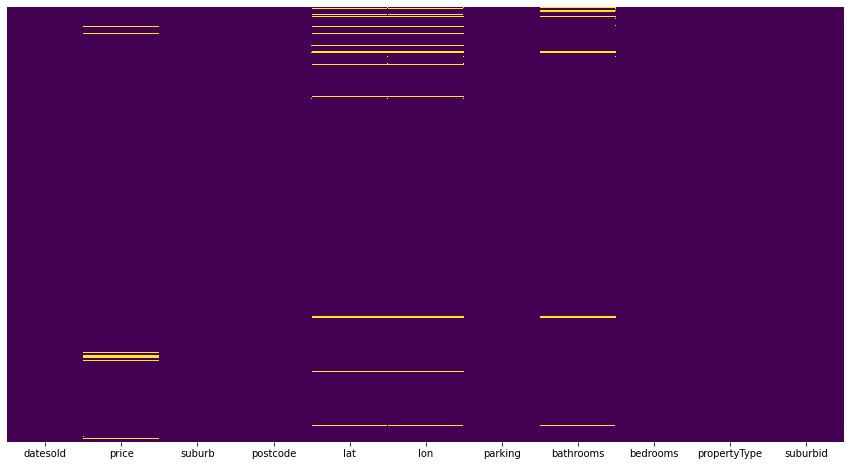

In [7]:
plt.figure(figsize=(15,8))
sns.heatmap(raw_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [8]:
raw_df.isna().sum()

datesold           0
price            743
suburb             0
postcode           0
lat             1145
lon             1145
parking            0
bathrooms        679
bedrooms           0
propertyType       0
suburbid           0
dtype: int64

In [9]:
df = raw_df.copy()

- __Determining Numerical and Categorical Features:__

In [10]:
len(df.columns)  # checking

11

In [11]:
categorical_columns = list(df.describe(exclude='number').columns)
numerical_columns = list(df.describe().columns)

In [12]:
numerical_columns.remove('postcode')
categorical_columns.append('postcode')

In [13]:
categorical_columns, len(categorical_columns)

(['datesold', 'suburb', 'propertyType', 'suburbid', 'postcode'], 5)

In [14]:
numerical_columns, len(numerical_columns)

(['price', 'lat', 'lon', 'parking', 'bathrooms', 'bedrooms'], 6)

- __Checking the Distribution of the Datasets Numerical Features Through Bar Plots:__

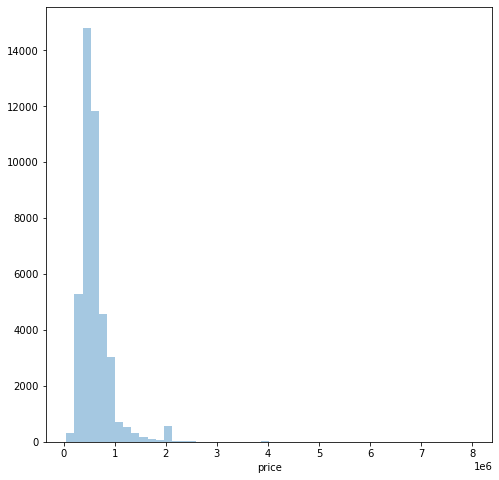

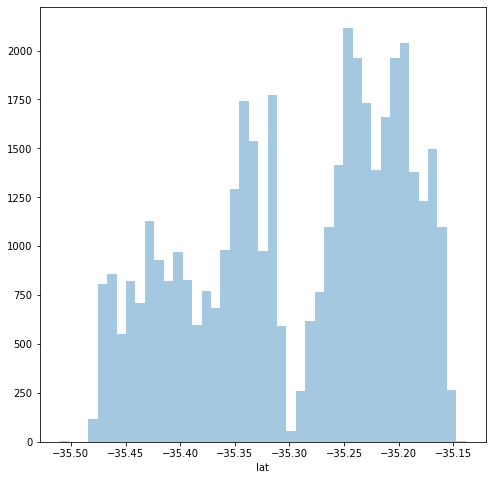

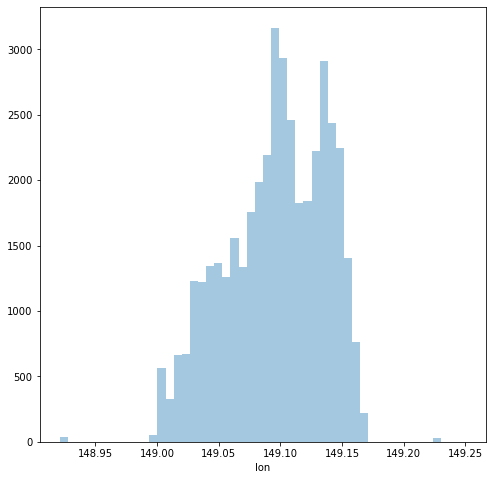

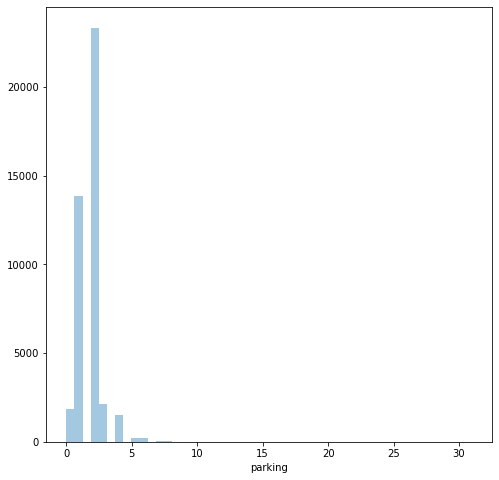

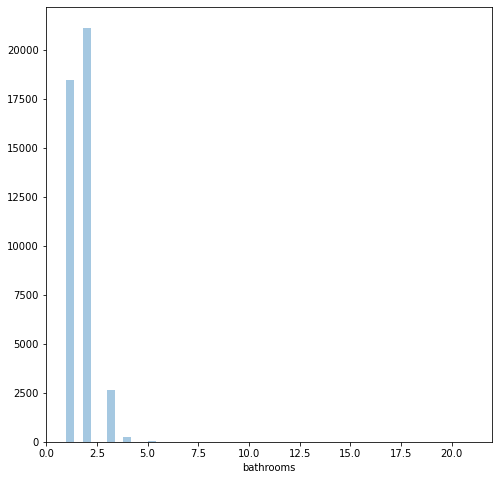

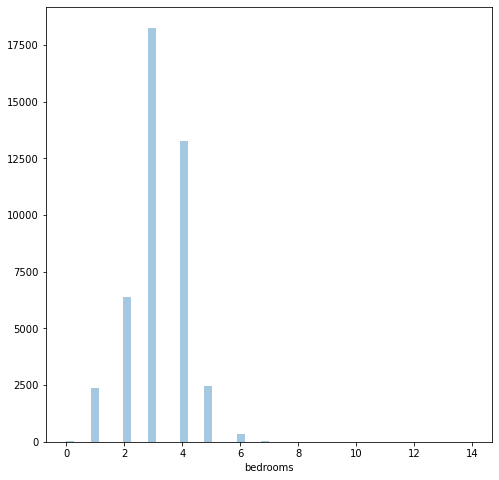

In [15]:
for i in numerical_columns:
    plt.figure(figsize = (8,8))
    sns.distplot(df[i], kde=False)

- __Using Scatter Plot to See the Relationship Between 'price' Column and Other Numerical Columns:__

In [16]:
numerical_columns_noprice = numerical_columns.copy()

In [17]:
numerical_columns_noprice.remove('price')

In [18]:
numerical_columns_noprice

['lat', 'lon', 'parking', 'bathrooms', 'bedrooms']

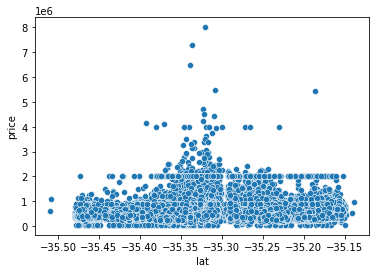

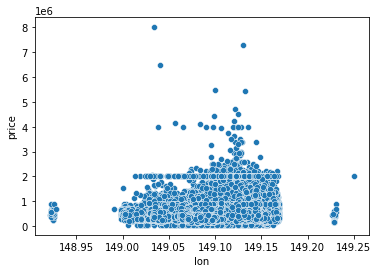

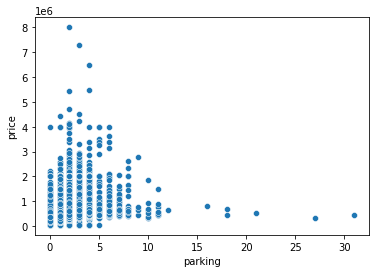

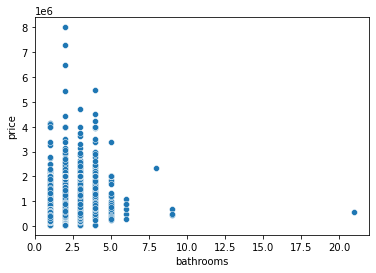

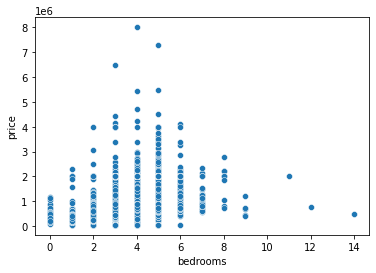

In [19]:
for i in numerical_columns_noprice:
    sns.scatterplot(df[i], df['price'])
    plt.show()

- __Checking Numerical Features Through Describe Method:__

In [20]:
df[numerical_columns].describe()

,price,lat,lon,parking,bathrooms,bedrooms
count,4.243500e+04,42033.000000,42033.000000,43178.000000,42499.000000,43178.000000
mean,6.037398e+05,-35.293447,149.096122,1.760017,1.643403,3.193501
std,3.139764e+05,0.091796,0.040526,0.937361,0.644463,0.990638
min,5.000000e+04,-35.509975,148.921424,0.000000,1.000000,0.000000
25%,4.300000e+05,-35.363857,149.067390,1.000000,1.000000,3.000000
50%,5.390000e+05,-35.270536,149.099522,2.000000,2.000000,3.000000
75%,6.760000e+05,-35.212323,149.130708,2.000000,2.000000,4.000000
max,8.000000e+06,-35.138572,149.250290,31.000000,21.000000,14.000000


- __Checking Categorical Features Through Describe Method:__

In [21]:
df[categorical_columns].describe(include='all')

,datesold,suburb,propertyType,suburbid,postcode
count,43178,43178,43178,43178,43178.000000
unique,3851,107,2,107,NaN
top,28/10/2017,Kambah,house,ACT601,NaN
freq,56,1404,36236,1404,NaN
mean,NaN,NaN,NaN,NaN,2728.855644
std,NaN,NaN,NaN,NaN,146.564444
min,NaN,NaN,NaN,NaN,2092.000000
25%,NaN,NaN,NaN,NaN,2607.000000
50%,NaN,NaN,NaN,NaN,2615.000000
75%,NaN,NaN,NaN,NaN,2905.000000


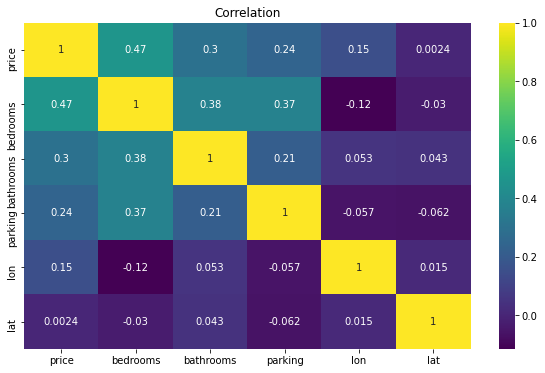

In [22]:
# Correlation Inspection

target = 'price'
k = 7 # number of variables for heatmap
cols = df[numerical_columns].corr().nlargest(k, target)[target].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')
plt.title('Correlation')
plt.show()

Through this heatmap it can be seen that 'lat', and 'lon' columns have relatively small correlation with the 'price' column, while 'bedrooms' has the highest.

> #### Removing Features

- __Checking the Features:__

In [23]:
categorical_columns

['datesold', 'suburb', 'propertyType', 'suburbid', 'postcode']

In [24]:
numerical_columns

['price', 'lat', 'lon', 'parking', 'bathrooms', 'bedrooms']

- __Removing 'datesold' and 'suburbid' features:__

In [25]:
print("Number of unique values in 'suburb' column: ", df['suburb'].nunique())
print("Number of unique values in 'suburbid' column: ", df['suburbid'].nunique())

Number of unique values in 'suburb' column:  107
Number of unique values in 'suburbid' column:  107


In [26]:
categorical_columns.remove('datesold')
categorical_columns.remove('suburbid')

In [27]:
categorical_columns

['suburb', 'propertyType', 'postcode']

'datesold' column is going to be dropped since this feature only beneficial for data analysis and visualization stages; and not in modelling phase. In addition, 'suburbid' feature is also going to be removed since it is just conveying the id of suburbs in 'suburb' column.

- __Removing 'postcode' feature:__

In [28]:
print("Number of unique values in 'suburb' column: ", df['suburb'].nunique())
print("Number of unique values in 'postcode' column: ", df['postcode'].nunique())

Number of unique values in 'suburb' column:  107
Number of unique values in 'postcode' column:  32


In [29]:
categorical_columns.remove('postcode')

In [30]:
categorical_columns

['suburb', 'propertyType']

At this stage, 'postcode' feature is going to be deleted since it covers Canberra area significantly wider than 'suburb' feature, thus it lacks precision. This machine learning model will rely on 'suburb' feature to categorize real estate properties which are being sold in Canberra.

- __Removing 'lat' and 'lon' features:__

In [31]:
numerical_columns.remove('lat')
numerical_columns.remove('lon')

In [32]:
numerical_columns

['price', 'parking', 'bathrooms', 'bedrooms']

As 'lat' and 'lon' columns have low correlation values with 'price' column and this machine learning model is going to solely rely on 'suburb' as the main feature to categorize properties that are being sold in Canberra, both of them are going to be removed.

In [34]:
df.head()

,datesold,price,suburb,postcode,lat,lon,parking,bathrooms,bedrooms,propertyType,suburbid
0,9/06/2000,223000.0,Nicholls,2913,NaN,NaN,2,2.0,4,house,ACT708
1,1/01/2001,350000.0,Ngunnawal,2913,NaN,NaN,1,NaN,3,house,ACT706
2,11/12/2003,550000.0,Weston,2611,NaN,NaN,2,NaN,4,house,ACT441
3,21/09/2005,276000.0,Isabella Plains,2905,NaN,NaN,1,1.0,3,house,ACT612
4,1/11/2005,400000.0,Conder,2906,NaN,NaN,2,NaN,5,house,ACT613


- __Updating Data Frame:__

In [35]:
df_numerical = df[numerical_columns]
df_categorical = df[categorical_columns]
df = pd.concat([df_numerical, df_categorical], axis=1)

In [36]:
df.head(3)

,price,parking,bathrooms,bedrooms,suburb,propertyType
0,223000.0,2,2.0,4,Nicholls,house
1,350000.0,1,NaN,3,Ngunnawal,house
2,550000.0,2,NaN,4,Weston,house


> #### Removing Missing Values

- __Removing Missing Values in 'price' column:__

In [37]:
df.isna().sum()

price           743
parking           0
bathrooms       679
bedrooms          0
suburb            0
propertyType      0
dtype: int64

In [44]:
df.dropna(subset=['price'], inplace=True)

In [45]:
df.isna().sum()

price             0
parking           0
bathrooms       658
bedrooms          0
suburb            0
propertyType      0
dtype: int64

Missing values in 'price' column are going to be dropped since this machine learning model is depended on the historical datas in this column. Furthermore, missing values that exist in 'bathrooms' feature will be   resolved later through pipeline.

## Creating Several Machine Learning Benchmark Models

- __Determining the Dependent and Independent Features:__

In [53]:
# Selecting features and target

y = df['price']
X = df.drop('price', axis=1)

In [55]:
y[:5]  # checking

0    223000.0
1    350000.0
2    550000.0
3    276000.0
4    400000.0
Name: price, dtype: float64

In [56]:
X.head()

,parking,bathrooms,bedrooms,suburb,propertyType
0,2,2.0,4,Nicholls,house
1,1,NaN,3,Ngunnawal,house
2,2,NaN,4,Weston,house
3,1,1.0,3,Isabella Plains,house
4,2,NaN,5,Conder,house


- __Splitting Training-validation Set and Test Set:__

In [59]:
# Train test split

X_train_val, X_test, y_train_val, y_test= train_test_split(X, y, random_state=2021, test_size=0.2)

- __Updating Numerical and Categorical Columns:__

In [76]:
numerical_columns = list(X.describe().columns)
categorical_columns = list(X.describe(exclude='number').columns)

In [77]:
numerical_columns

['parking', 'bathrooms', 'bedrooms']

In [78]:
categorical_columns

['suburb', 'propertyType']

- __Creating a Linear Multiple Regression Model:__

In [90]:
df.isna().sum()

price             0
parking           0
bathrooms       658
bedrooms          0
suburb            0
propertyType      0
dtype: int64

In [91]:
numerical_columns

['parking', 'bathrooms', 'bedrooms']

In [95]:
# Creating a simple imputer pipeline
# imputing missing values in 'bathrooms' column with median resulting to little to no difference in 'bathrooms' standard deviation
numerical_pipeline = Pipeline([
    ('impute_num', SimpleImputer(strategy='median')),
    ('robust', RobustScaler())  # robust to outliers
])

# Creating a binary encoder pipeline
binary_pipeline = Pipeline([
    ('binary', ce.BinaryEncoder())
])

# Creating a onehot encoder pipeline
onehot_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='first'))
])


transformer = ColumnTransformer([
    ('impute_pipe', numerical_pipeline, numerical_columns), 
    ('onehot_pipe', onehot_pipeline, ['propertyType']),  
    ('binary_pipe', binary_pipeline, ['suburb'])    
], remainder='passthrough')

In [97]:
X_train_val_transform = transformer.fit_transform(X_train_val, y_train_val)
X_test_transform = transformer.transform(X_test)

In [98]:
X_train_val_transform  # checking

array([[ 0., -1.,  1., ...,  0.,  0.,  1.],
       [-1., -1., -1., ...,  0.,  1.,  0.],
       [ 0., -1.,  0., ...,  0.,  1.,  1.],
       ...,
       [-1.,  0.,  0., ...,  0.,  1.,  0.],
       [-1., -1., -1., ...,  1.,  1.,  0.],
       [-1., -1.,  1., ...,  1.,  0.,  0.]])

In [103]:
X_test_transform  # checking

array([[ 0.,  0., -1., ...,  1.,  1.,  1.],
       [ 0.,  0.,  1., ...,  0.,  1.,  0.],
       [ 0., -1.,  0., ...,  1.,  0.,  0.],
       ...,
       [-1., -1.,  0., ...,  0.,  1.,  0.],
       [ 0., -1.,  0., ...,  0.,  1.,  0.],
       [-1., -1.,  0., ...,  0.,  1.,  1.]])

In [ ]:
# knn_transformer = ColumnTransformer([
#     ('robust', RobustScaler(), list(X.columns))
# ], remainder = 'passthrough')  

# imbpipe_knn = imbPipeline([
#     ('transformer', knn_transformer),
#     ('balancing', smote),
#     ('clf', knn)
# ])

In [101]:
x = sm.add_constant(X_train_val_transform)
results = sm.OLS(y_train_val, x).fit()

In [102]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     1181.
Date:                Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:23:50   Log-Likelihood:            -4.7140e+05
No. Observations:               33948   AIC:                         9.428e+05
Df Residuals:                   33936   BIC:                         9.429e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.398e+05   4498.996    119.993      0.000    5.31e+05    5.49e+05
x1          2.117e+04   1657.411     12.773      0.000    1.79e+04    2.44e+04
x2          5.978e+04   2430.996     24.591      0.000     5.5e+04    6.45e+04
x3          1.346e+05   1992.100     67.589      0.000    1.31e+05    1.39e+05
x4          3.511e+04   4861.088      7.223      0.000    2.56e+04    4.46e+04
x5          6.004e-12   1.45e-12      4.135      0.000    3.16e-12    8.85e-12
x6          7.921e+04   3381.973     23.422      0.000    7.26e+04    8.58e+04
x7          2.123e+04   3261.937      6.508      0.000    1.48e+04    2.76e+04
x8          5.501e+04   2869.052     19.175      0.000    4.94e+04    6.06e+04
x9         -2.302e+04   2854.780     -8.064      0.000   -2.86e+04   -1.74e+04
x10        -1.705e+04   2852.901     -5.977      0.000   -2.26e+04   -1.15e+04
x11          4.06e+04   2856.785     14.211      0.000     3.5e+04    4.62e+04
x12         -976.5748   2836.862     -0.344      0.731   -6536.921    4583.771
==============================================================================
Omnibus:                    27983.673   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1265095.117
Skew:                           3.688   Prob(JB):                         0.00
Kurtosis:                      31.982   Cond. No.                     3.69e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.13e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

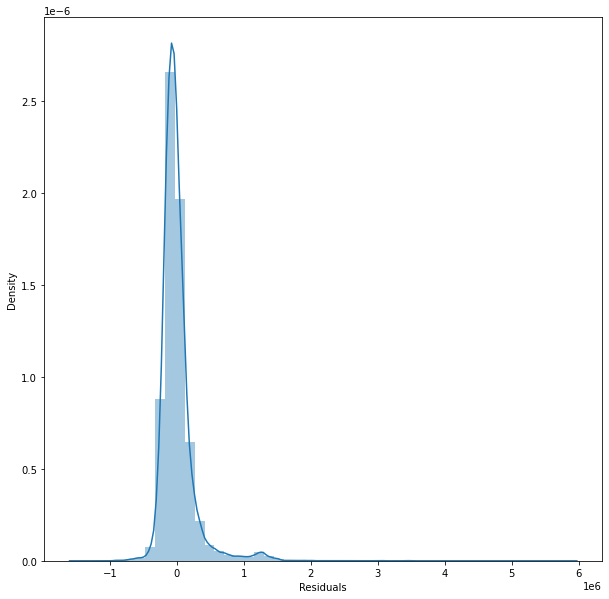

In [105]:
plt.figure(figsize=(10,10))
sns.distplot(results.resid)
plt.xlabel('Residuals')
plt.show()

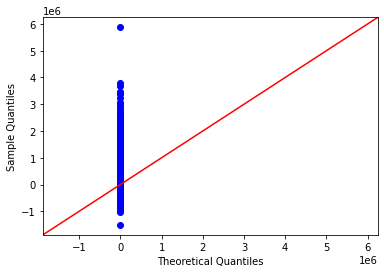

In [106]:
sm.qqplot(results.resid, line='45')
plt.show()

Text(0, 0.5, 'Residuals')

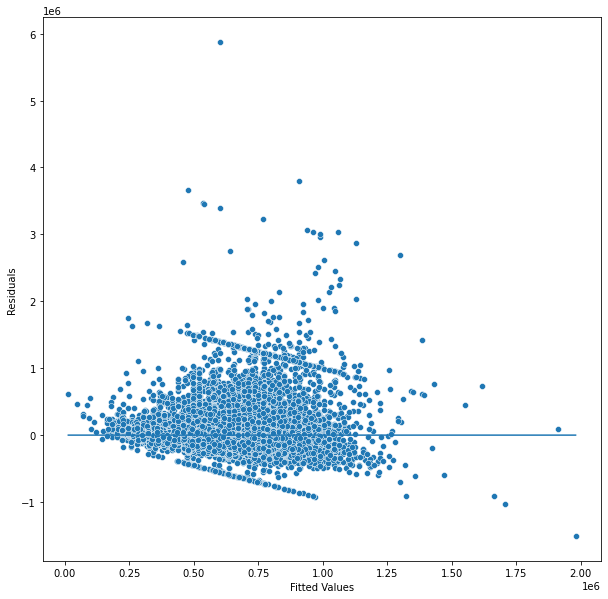

In [109]:
plt.figure(figsize=(10,10))
sns.scatterplot(results.fittedvalues, results.resid)
sns.lineplot(results.fittedvalues,0)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()